# Lab: Explorando la modelos logístico

Recordemos: Un clasificador es un modelo que predice una **etiqueta discreta** cuando se le muestra un conjunto de **predictores**. En el aprendizaje automático, construimos clasificadores usando conjuntos de datos extraídos de nuestra población objetivo.

Los clasificadores pueden definirse como particiones del **espacio predictor** en **regiones de decisión**. Una región de decisión es una región dentro del espacio predictor de tal manera que cualquier muestra que esté dentro de ella se le asigna la misma etiqueta. Las regiones de decisión están separadas por **fronteras de decisión** y, por lo tanto, es común definir clasificadores usando sus fronteras de decisión, por ejemplo:
- Si la muestra \(x_i\) está en un lado de la frontera, se clasifica como <font color=red> **O** </font>.
- Si \(x_i\) está en el otro lado, se clasifica como <font color=blue> **O** </font>.

Aunque las fronteras y regiones de decisión definen clasificadores, no todos los clasificadores usan estas nociones para etiquetar muestras. El algoritmo kNN es un ejemplo de esto: para clasificar una muestra, kNN no busca la frontera, sino los k vecinos más cercanos de la muestra.

En este laboratorio exploraremos los conceptos básicos de la clasificación. usaremos la **función logística** para crear una noción de "certeza" del clasificador, que luego usaremos para definir el **clasificador de regresión logística**. Finalmente, implementaremos dos enfoques de optimización para identificar la solución de regresión logística, a saber, **búsqueda exhaustiva** y **descenso del gradiente**.

Por útimo usaremos una dataset para  hacer una predicción a partir de la regresion logística

# Función Logística: la certeza de un clasificador lineal

Para utilizar un clasificador lineal, creemos la noción de "certeza" del clasificador usando la **función logística** (también conocida como expit o sigmoide) \(p(d)\):

$$
p(d) =\frac{e^d}{e^d + 1} = \frac{1}{1 + e^{-d}}
$$

Vamos a graficarla primero (podríamos implementarla fácilmente nosotros mismos, pero simplemente usaremos la función `expit` de la biblioteca científica `scipy`):



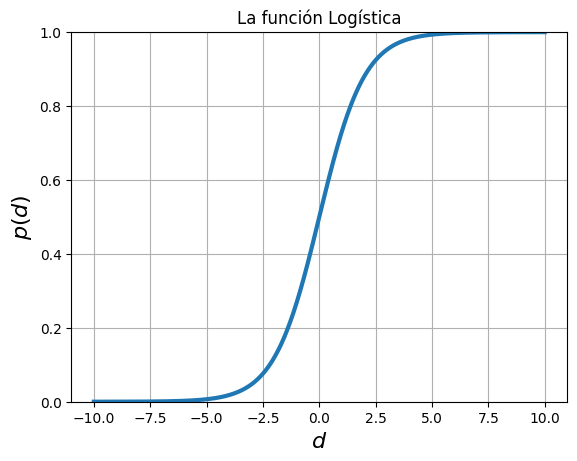

In [1]:
from scipy.special import expit
import numpy as np

import matplotlib.pyplot as plt

d = np.linspace(-10, 10, 1000)

plt.title("La función Logística")
plt.plot(d, expit(d), linewidth = 3)
plt.xlabel('$d$', fontsize=16)
plt.ylabel('$p(d)$', fontsize=16)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Observa que:
- $p(d) \rightarrow 1$ cuando $d \rightarrow \infty$,
- $p(0) = 0.5$,
- $p(d) \rightarrow 0$ cuando $d \rightarrow -\infty$.

En clasificación, la cantidad $\boldsymbol{x}^T\boldsymbol{w}$ puede ser interpretada como una distancia entre la muestra $\boldsymbol{x}$ y la frontera. Estableciendo $d=\boldsymbol{x}^T\boldsymbol{w}$, usaremos la cantidad $p(\boldsymbol{x}^T\boldsymbol{w})$ para medir la certeza de un clasificador de que una muestra $\boldsymbol{x}$ pertenece a una de las clases.

Definiremos una nueva función `p(W, w)` correspondiente a la cantidad $p(\boldsymbol{x}^T\boldsymbol{w})$:


In [30]:
from scipy.special import expit
import numpy as np

def p(X, w):
  return expit(np.dot(X, w))

Veamos cómo podemos usar la función logística para definir la noción de certeza en clasificadores. Primero crearemos un nuevo clasificador lineal definido por los coeficientes $\boldsymbol{w} = [0.25, -1, 0]^T$ y mostraremos las regiones de decisión que define:


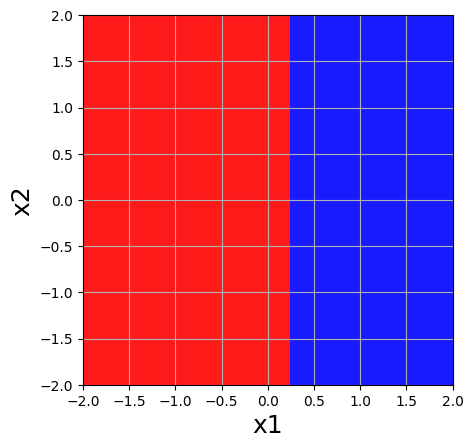

In [3]:
import matplotlib.pyplot as plt

# Coeficientes del clasificador

w = np.array([0.25, -1, 0], ndmin=2).T

# 100x100 muestras utilizadas para visualizar las regiones de decisión,
# la matriz de diseño y las etiquetas predichas para cada muestra

coor1 = np.linspace(-2, 2, 100)
coor2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(coor1, coor2)
X = np.column_stack([np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()])
yPred = 1*(np.dot(X, w) > 0)

# Muestra las regiones de decisión al visualizar como una imagen la etiqueta
# predicha de las 100x100 muestras
image = plt.imshow(yPred.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-2, 2, -2, 2),
                          origin = 'lower',
                          alpha = 0.9)

plt.xlabel("x1", fontsize=18)
plt.ylabel("x2", fontsize=18)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Asegúrate de ser capaz de identificar fronteras lineales en un espacio predictor 2D utilizando el vector de coeficientes $\boldsymbol{w}$. puntualmene $w = [0.25, -1, 0]$


Ahora consideremos 7 muestras que **pertenecen a la clase 1**. La cantidad $p(\boldsymbol{x}^T\boldsymbol{w})$ corresponde a la certeza del clasificador de que cada muestra pertenece a la clase 1. Ahora podemos graficar las 7 muestras junto con la certeza del clasificador para cada una de ellas:


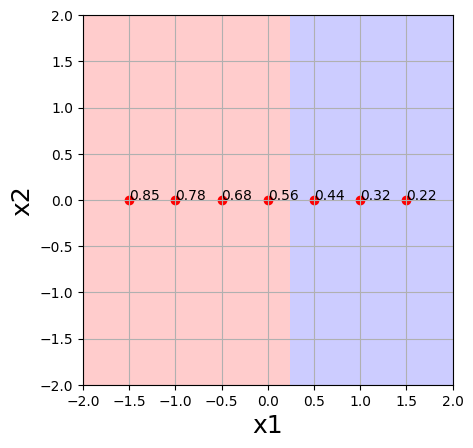

In [4]:
# 7 samples
x1 = np.array([1.5, 1, 0.5,  0, -0.5, -1, -1.5])
x2 = np.array(np.zeros(x1.shape))

# Certeza del clasificador de que cada muestra pertenece a la clase 1
X = np.column_stack([np.ones(x1.shape), x1, x2])
certainty_1 = p(X, w)

# Visualización del clasificador, muestra y valores de certeza
image = plt.imshow(yPred.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-2, 2, -2, 2),
                          origin = 'lower',
                          alpha = 0.2)

plt.scatter(x1, x2, color = 'red')
plt.xlabel("x1", fontsize=18)
plt.ylabel("x2", fontsize=18)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)


for i, c1 in enumerate(certainty_1):
    plt.annotate(round(c1.item(),2), (x1[i], x2[i]))

plt.show()


Si las mismas muestras **pertenecen a la clase 0 en su lugar**, la certeza del clasificador de que pertenecen a la clase 0 se calcula como $1 - p(\boldsymbol{x}^T\boldsymbol{w})$:


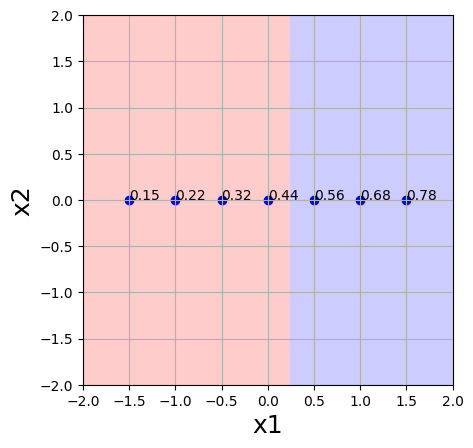

In [5]:
# Certeza del clasificador de que cada muestra pertenece al 0

certainty_0 = 1-p(X, w)

# Visualización del clasificador, muestra y valores de certeza

image = plt.imshow(yPred.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-2, 2, -2, 2),
                          origin = 'lower',
                          alpha = 0.2)

plt.scatter(x1, x2, color = 'blue')
plt.xlabel("x1", fontsize=18)
plt.ylabel("x2", fontsize=18)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

for i, c1 in enumerate(certainty_0):
    plt.annotate(round(c1.item(),2), (x1[i], x2[i]))

plt.show()

# Verosimilitud (likelihood)

Como puedes ver, el valor de certeza para una muestra que se encuentra en la región de decisión correcta es mayor que 0.5, y aumenta hacia 1 a medida que nos alejamos de la frontera. A las muestras que se encuentran en la región de decisión incorrecta se les asigna una certeza por debajo de 0.5, que disminuye hacia 0 a medida que nos alejamos de la frontera.

Además de calcular la certeza del clasificador para cada muestra individual, también podemos hacerlo para un conjunto de datos completo simplemente multiplicando las certezas individuales. La cantidad resultante \( L \) es conocida como la **verosimilitud (likelihood)**:

$$
L=\prod_{y_i=0}\left(1-p(\boldsymbol{x}_i^T \boldsymbol{w})\right) \prod_{y_i=1}p(\boldsymbol{x}_i^T \boldsymbol{w})
$$

La **log-verosimilitud negativa (negative log-likelihoods)** es una forma más conveniente de cuantificar la certeza del clasificador:

$$
-\log L(\boldsymbol{w})=-\sum_{y_i=0}\log\left(1-p(\boldsymbol{x}_i^T \boldsymbol{w})\right) -\sum_{y_i=1}\log p(\boldsymbol{x}_i^T \boldsymbol{w})\\
= -\sum_{y_i}[(1-y_i)\log\left(1-p(\boldsymbol{x}_i^T \boldsymbol{w})\right) +y_i\log p(\boldsymbol{x}_i^T \boldsymbol{w})]
$$


En la siguiente celda, definiremos varias funciones nuevas que implementan el código para predecir etiquetas y calcular la verosimilitud (**likelihood**), log-verosimilitud negativa (**negative log-likelihood**) y precisión (**accuracy**) de un clasificador:


In [61]:
# Returns the predicted labels
def prediction(X, w):
  return 1*(np.dot(X, w) > 0)

# Computes the likelihood
def likelihood(X, w, y):
  return np.prod(y*p(X, w) + (1-y)*(1-p(X, w)))

# Computes the negative log-likelihood
def negLogLikelihood(X, w, y):
  return -np.sum(y * np.log(p(X,w)) + (1 - y) * np.log(1 - p(X,w)))

# Computes the accuracy by comparing true labels y and predicted labels yP
def accuracy(y, yP):
  return np.sum(y==yP)/len(y)


Presentemos dos conjuntos de datos diferentes a nuestro clasificador y calculemos la verosimilitud $L$, la log-verosimilitud negativa $l$, la precisión y la tasa de error para cada conjunto de datos. La siguiente celda considera el primer conjunto de datos:


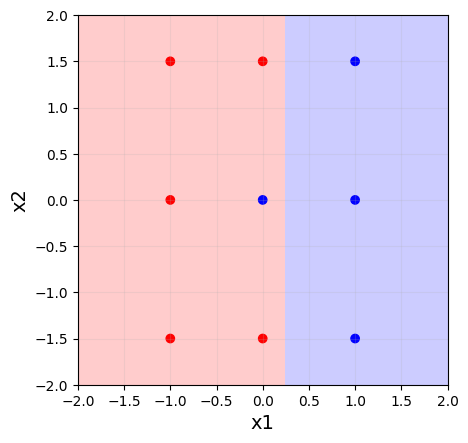

,Descripción,Valor
0,Certezas individuales,"[[0.78], [0.56], [0.68], [0.78], [0.44], [0.68..."
1,likelihoods L,0.020359
2,negative Log-likelihoods -log(L),3.894219
3,Accuracy,0.89
4,Error,0.11


In [7]:
# 1er conjunto de datos compuesto por 9 muestras, x1 y x2 son los predictores, y es la etiqueta true
x1 = np.array([-1, 0, 1, -1,  0, 1, -1, 0, 1], ndmin=2).T
x2 = np.array([1.5, 1.5, 1.5,  0, 0, 0, -1.5, -1.5, -1.5], ndmin=2).T
y  = np.array([1, 1, 0, 1,  0, 0, 1, 1, 0], ndmin=2).T


# Visualización de las regiones de decisión y muestras. El color de las muestras corresponde a la Etiqueta TRUE
image = plt.imshow(yPred.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-2, 2, -2, 2),
                          origin = 'lower',
                          alpha = 0.2)

scatter = plt.scatter(x1, x2, c=y, cmap=plt.get_cmap('bwr'))

plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(alpha=0.2)
plt.show()

# Matriz de diseño
X = np.column_stack([np.ones(x1.shape), x1, x2])
# Eetiqueta predicha
yP = prediction(X, w)
#certezas
certainty = y*p(X, w) + (1-y)*(1-p(X, w))
#likelihoods s
L = likelihood(X, w, y)
# negative log-likelihoods
l = negLogLikelihood(X, w, y)

# Accuracy and error rate
A = accuracy(y, yP)
E = 1 - A


import pandas as pd

data = pd.DataFrame({
    'Descripción': ['Certezas individuales', 'likelihoods L', 'negative Log-likelihoods  -log(L)', 'Accuracy', 'Error'],
    'Valor': [np.around(certainty,2), L, l, round(A, 2), round(E, 2)]
})

data


a continuación validamos un segundo dataset:

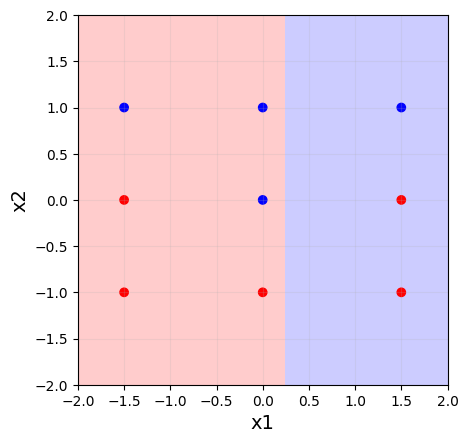

,Descripción,Valor
0,Certezas individuales,"[[0.22], [0.22], [0.78], [0.56], [0.44], [0.44..."
1,likelihoods L,0.000446
2,negative Log-likelihoods -log(L),7.714278
3,Accuracy,0.44
4,Error,0.56


In [8]:
# @title Texto de título predeterminado
# 2nd dataset consisting of 9 samples

x1 = np.array([1.5, 1.5, 1.5,  0, 0, 0, -1.5, -1.5, -1.5], ndmin=2).T
x2 = np.array([-1, 0, 1, -1,  0, 1, -1, 0, 1], ndmin=2).T
y  = np.array([1, 1, 0, 1,  0, 0, 1, 1, 0], ndmin=2).T

# Visualización de las regiones de decisión y muestras. El color de las muestras corresponde a la Etiqueta TRUE
image = plt.imshow(yPred.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-2, 2, -2, 2),
                          origin = 'lower',
                          alpha = 0.2)

scatter = plt.scatter(x1, x2, c=y, cmap=plt.get_cmap('bwr'))

plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(alpha=0.2)
plt.show()

# Matriz de diseño
X = np.column_stack([np.ones(x1.shape), x1, x2])
# Eetiqueta predicha
yP = prediction(X, w)
#certezas
certainty_2 = y*p(X, w) + (1-y)*(1-p(X, w))
#likelihoods s
L_2 = likelihood(X, w, y)
# negative log-likelihoods
l_2 = negLogLikelihood(X, w, y)


# Accuracy and error rate
A_2 = accuracy(y, yP)
E_2 = 1 - A_2

import pandas as pd

data = pd.DataFrame({
    'Descripción': ['Certezas individuales', 'likelihoods L', 'negative Log-likelihoods  -log(L)', 'Accuracy', 'Error'],
    'Valor': [np.around(certainty_2,2), L_2, l_2, round(A_2, 2), round(E_2, 2)]
})

data

Compara los valores de likelihood, log-likelihood negativa, accuracies y tasa de error para ambos conjuntos de datos. El clasificador hace un mejor trabajo con el primer conjunto de datos.

Visualmente, es claro que separa mejor el primer conjunto de datos. Además, el clasificador produce una likelihood más alta (log-likelihood negativa más baja) y un accuracy más alta (tasa de error más baja) cuando se le muestra el primer conjunto de datos.



In [9]:

data = pd.DataFrame({
    'Descripción': ['Certezas individuales', 'likelihoods L', 'negative Log-likelihoods', 'Accuracy', 'Error'],
    'Valor DataSet 1': [np.around(certainty,2), L, l, round(A, 2), round(E, 2)],
    'Valor DataSet 2': [np.around(certainty_2,2), L_2, l_2, round(A_2, 2), round(E_2, 2)]
})

data

,Descripción,Valor DataSet 1,Valor DataSet 2
0,Certezas individuales,"[[0.78], [0.56], [0.68], [0.78], [0.44], [0.68...","[[0.22], [0.22], [0.78], [0.56], [0.44], [0.44..."
1,likelihoods L,0.020359,0.000446
2,negative Log-likelihoods,3.894219,7.714278
3,Accuracy,0.89,0.44
4,Error,0.11,0.56


# Comparando clasificadores

En la sección anterior, hemos mostrado dos conjuntos de datos diferentes al mismo clasificador. Ahora consideraremos un único conjunto de datos y diferentes clasificadores lineales.

Sube los archivos `lab_logistic_train.csv` y `lab_logistic_test.csv`. Comencemos graficando el conjunto de datos de entrenamiento:


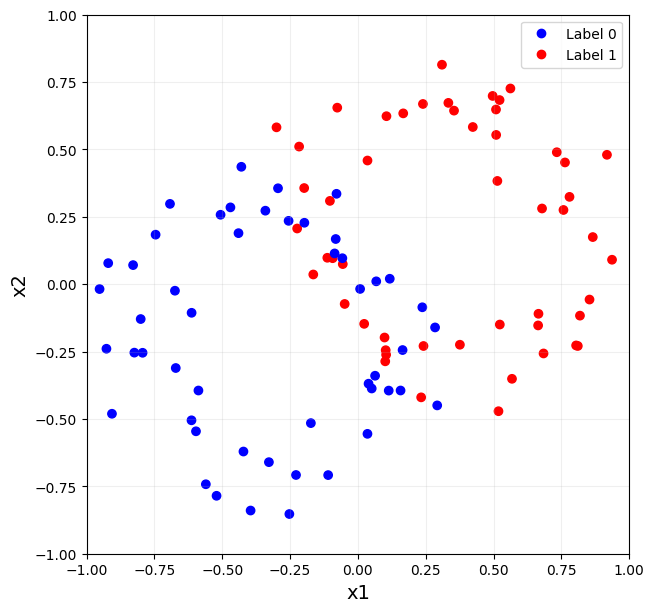

In [64]:
import pandas as pd

df_train = pd.read_csv("lab_logistic_train.csv")
df_test = pd.read_csv("lab_logistic_test.csv")

N = df_train['Label'].size

# Almacena cada atributo en diferentes matrices NumPy de (N,1)

x1_train = df_train['Attribute_1'].to_numpy().reshape(N,1)
x2_train = df_train['Attribute_2'].to_numpy().reshape(N,1)
y_train = df_train['Label'].to_numpy().reshape(N,1)


# Plots
fig = plt.figure(figsize=(7, 7))

scatter = plt.scatter(x1_train, x2_train, c=y_train, cmap=plt.get_cmap('bwr'))
plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(alpha=0.2)
plt.legend(handles=scatter.legend_elements()[0], labels=["Label 0", "Label 1"])
plt.show()


## Definición de clasificadores

Ahora consideremos dos clasificadores lineales A y B definidos por los vectores de coeficientes $\boldsymbol{w}_A=[0, 1, 1]$ y $\boldsymbol{w}_B=[0, 1, -1]$, respectivamente. Vamos a mostrar primero sus regiones de decisión:


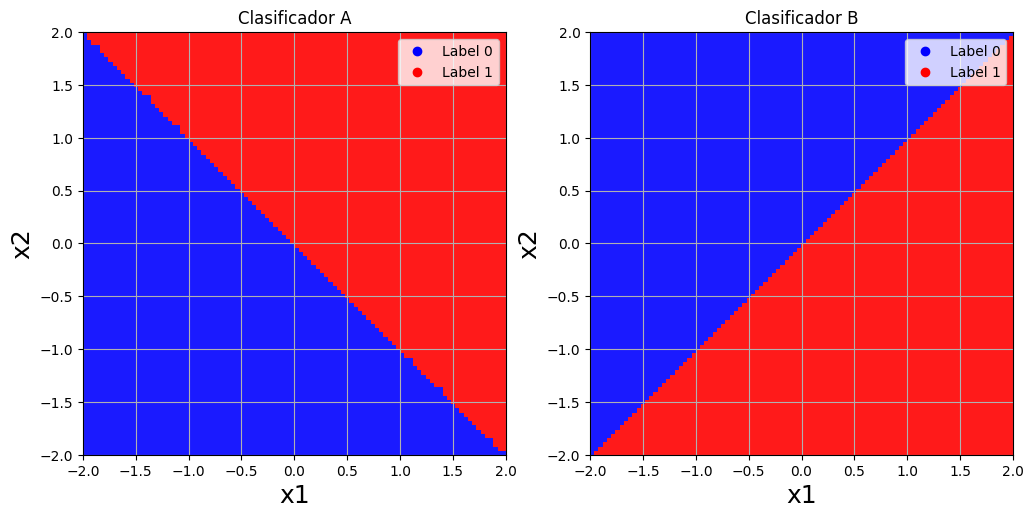

In [65]:
# Coeficientes  del clasificador
wA = np.array([0, 1, 1], ndmin=2).T
wB = np.array([0, 1, -1], ndmin=2).T

# 100x100 muestras utilizadas para visualizar las regiones de decisión,
# la matriz de diseño y las etiquetas predichas para cada muestra

coor1 = np.linspace(-2, 2, 100)
coor2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(coor1, coor2)
X = np.column_stack([np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()])
yPredA = prediction(X, wA)
yPredB = prediction(X, wB)

# Muestra las regiones de decisión al visualizar como una
# imagen la etiqueta predicha de las 100x100 muestras

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

image = ax1.imshow(yPredA.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-2, 2, -2, 2),
                          origin = 'lower',
                          alpha = 0.9)

ax1.set_title("Clasificador A")
ax1.set_xlabel("x1", fontsize=18)
ax1.set_ylabel("x2", fontsize=18)
ax1.grid(True)
ax1.set_aspect('equal', adjustable='box')
ax1.legend(handles=scatter.legend_elements()[0], labels=["Label 0", "Label 1"])

image = ax2.imshow(yPredB.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-2, 2, -2, 2),
                          origin = 'lower',
                          alpha = 0.9)

ax2.set_title("Clasificador B")
ax2.set_xlabel("x1", fontsize=18)
ax2.set_ylabel("x2", fontsize=18)
ax2.grid(True)
ax2.set_aspect('equal', adjustable='box')
ax2.legend(handles=scatter.legend_elements()[0], labels=["Label 0", "Label 1"])

plt.show()

## Metricas para cada Clasificador

Visualmente, ¿cuál clasificador crees que hará un mejor trabajo? Obtengamos las precisiones (accuracy) de entrenamiento, tasa de error, LogLikelihood y Log-Likelihood negativa.


,Métrica,Clasificador A,Clasificador B
0,likelihood (L),4.031494e-22,1.914723e-29
1,negative log-likelihood (-log(L)),4.926274e+01,6.612539e+01
2,accuracy,7.920792e-01,5.544554e-01
3,error rate,2.079208e-01,4.500000e-01


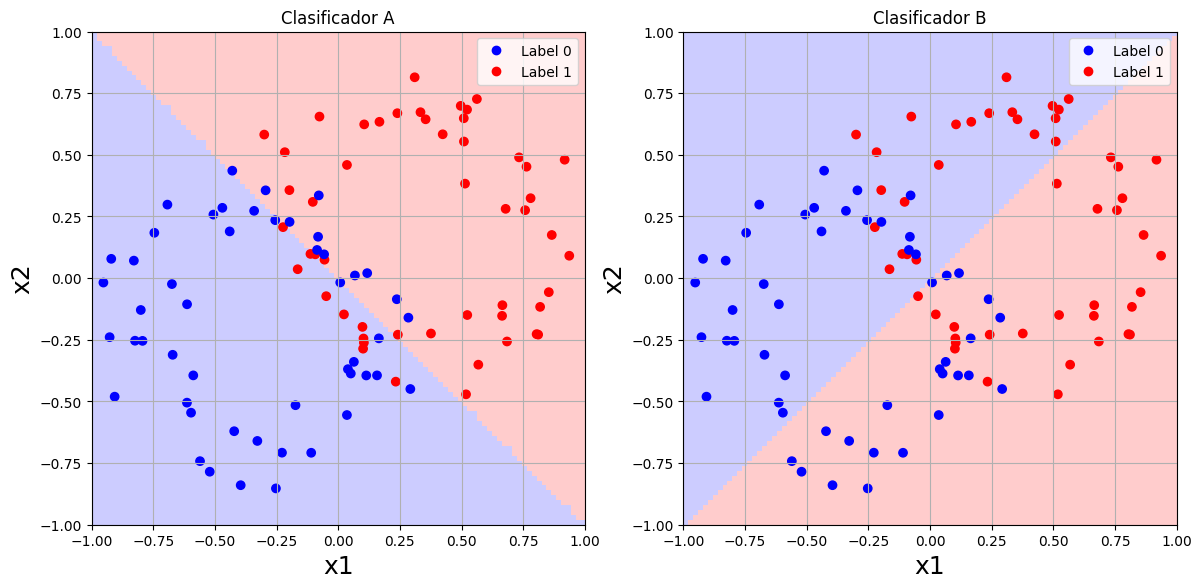

In [66]:

# Matriz de diseño
X_train = np.column_stack([np.ones(x1_train.shape), x1_train, x2_train])

# etiqueta predicha
y_trainPredA = prediction(X_train, wA)
y_trainPredB = prediction(X_train, wB)

# Likelihood, neg log-likelihood, accuracy and error rate for classifier A
LA = likelihood(X_train, wA, y_train)
nlogLA = negLogLikelihood(X_train, wA, y_train)
AA = accuracy(y_train, y_trainPredA)
EA = 1 - AA

# Likelihood, neg log-likelihood, accuracy and error rate for classifier B
LB = likelihood(X_train, wB, y_train)
nlogLB = negLogLikelihood(X_train, wB, y_train)
AB = accuracy(y_train, y_trainPredB)
EB = 1 - AB

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

image = ax1.imshow(yPredA.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-1, 1, -1, 1),
                          origin = 'lower',
                          alpha = 0.2)
scatter = ax1.scatter(x1_train, x2_train, c=y_train, cmap=plt.get_cmap('bwr'))
ax1.set_title("Clasificador A")
ax1.set_xlabel("x1", fontsize=18)
ax1.set_ylabel("x2", fontsize=18)
ax1.grid(True)
ax1.set_aspect('equal', adjustable='box')
ax1.legend(handles=scatter.legend_elements()[0], labels=["Label 0", "Label 1"])

image = ax2.imshow(yPredB.reshape((100, 100)),
                          cmap = 'bwr',
                          interpolation='none',
                          extent = (-1, 1, -1, 1),
                          origin = 'lower',
                          alpha = 0.2)
scatter = ax2.scatter(x1_train, x2_train, c=y_train, cmap=plt.get_cmap('bwr'))
ax2.set_title("Clasificador B")
ax2.set_xlabel("x1", fontsize=18)
ax2.set_ylabel("x2", fontsize=18)
ax2.grid(True)
ax2.set_aspect('equal', adjustable='box')
ax2.legend(handles=scatter.legend_elements()[0], labels=["Label 0", "Label 1"])



data = pd.DataFrame({
    'Métrica': ['likelihood (L)', 'negative log-likelihood (-log(L))', 'accuracy', 'error rate'],
    'Clasificador A': [LA, nlogLA, AA, EA],
    'Clasificador B': [LB, nlogLB, AB, round(EB, 2)]
})
data

Basándonos en estos resultados, si tuviéramos que elegir entre los dos, está claro que seleccionaríamos el clasificador A. También vale la pena señalar que la verosimilitud de ambos clasificadores es un número muy pequeño. Recuerda que la verosimilitud se obtiene multiplicando certezas individuales, que siempre son menores que uno. Por lo tanto, cuanto más grande sea el conjunto de datos, más cerca estará la verosimilitud de cero. Esto puede llevar a un **desbordamiento inferior** (underflow), que es una situación en la que tu computadora no puede representar un número muy pequeño y es una de las razones por las que usamos la log-verosimilitud, ya que sus valores no sufrirán de desbordamiento inferior.


## Modificacion de coeficientes
La siguiente celda representa la cantidad $p(\boldsymbol{x}^T\boldsymbol{w})$ en cada punto del espacio predictor para un límite lineal definido por los coeficientes en el array`wTryMe. Esencialmente, estarás observando la función logística en 2D.

**Cambia el valor de los coeficientes para ver qué sucede con esos valores**. Por ejemplo:
- Multiplica todos los coeficientes por el mismo número positivo, ¿qué observas? ¿Cambia la precisión? ¿Y la verosimilitud?
- ¿Qué pasa si multiplicas todos los coeficientes por -1?
- Cambia los coeficientes individualmente para ver qué sucede con el límite lineal.



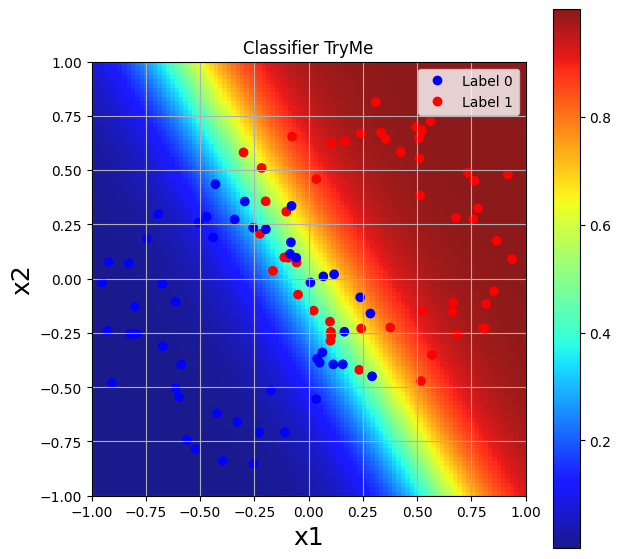

,Métrica,Clasificador W=[[-0.024604 3.01860714 1.791084 ]]
0,likelihood (L),8.666045e-16
1,negative log-likelihood (-log(L)),3.468195e+01
2,accuracy,8.019802e-01
3,error rate,1.980198e-01


In [67]:
# Cambia los coeficientes a continuación para ver cómo cambia el clasificador
wTryMe = np.array([0, 1, 1], ndmin=2).T
wTryMe = np.array([-0.024604, 3.01860714, 1.791084], ndmin=2).T

coor1 = np.linspace(-2, 2, 100)
coor2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(coor1, coor2)
X = np.column_stack([np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()])

# Plot
plt.figure(figsize=(7, 7))
image = plt.imshow(p(X, wTryMe).reshape((100, 100)),
                          cmap = 'jet',
                          interpolation='none',
                          extent = (-1, 1, -1, 1),
                          origin = 'lower',
                          alpha = 0.9)
plt.colorbar()

scatter = plt.scatter(x1_train, x2_train, c=y_train, cmap=plt.get_cmap('bwr'))
plt.title("Classifier TryMe")
plt.xlabel("x1", fontsize=18)
plt.ylabel("x2", fontsize=18)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(handles=scatter.legend_elements()[0], labels=["Label 0", "Label 1"])

plt.show()

y_trainTryMe = prediction(X_train, wTryMe)

# Metricas
LTryMe = likelihood(X_train, wTryMe, y_train)
nlogLTryMe = negLogLikelihood(X_train, wTryMe, y_train)
ATryMe = accuracy(y_train, y_trainTryMe)
ETryMe = 1 - ATryMe

data = pd.DataFrame({
    'Métrica': ['likelihood (L)', 'negative log-likelihood (-log(L))', 'accuracy', 'error rate'],
    'Clasificador W='+str(wTryMe.T): [LTryMe, nlogLTryMe, ATryMe, ETryMe],

    })
data

# Regresión logística: Optimización

Hemos utilizado la función logística para crear una noción de certeza para los clasificadores, a saber, la likelihood (o, de manera equivalente, la log-likelihood negativa). Hemos visto que los clasificadores que separan bien las muestras de diferentes clases tienen una alta verosimilitud, mientras que los clasificadores que producen una separación deficiente tienen valores bajos de verosimilitud.

Los clasificadores de **"regresión" logística** utilizan la función de verosimilitud $L$ como métrica de calidad. Dado un conjunto de datos, el mejor clasificador se define como aquel con el valor de **likelihood más alto**. Este clasificador también proporciona el valor de **log-likelihood más alto** y obviamente el valor de **log-likelihood negativa más bajo**.

Ahora bien, ¿cómo encontramos el mejor clasificador? Para ello, necesitamos usar una estrategia de **optimización**. En esta sección implementaremos dos enfoques para encontrar la solución de regresión logística, a saber, **búsqueda exhaustiva** y **descenso del gradiente**. Utilizaremos la superficie de error definida por la **log-likelihood negativa** para encontrar la solución de regresión logística. Esta superficie es **convexa**, por lo que no necesitamos preocuparnos por los mínimos locales.



## Busqueda exhaustivos (exhaustive search)

Los **enfoques exhaustivos** básicamente evalúan una gran cantidad de opciones individualmente y seleccionan el modelo con el mejor rendimiento. En la siguiente celda evaluamos 8000 diferentes vectores de coeficientes y seleccionamos el que tiene la log-verosimilitud negativa más baja como nuestra solución.


In [34]:
from itertools import product
import pandas as pd

# se crea tres arrays lineales que varían de -1 a 1, y tienen 20 puntos equidistantes.
lw0 = np.linspace(-1, 1, 20)
lw1 = np.linspace(-1, 1, 20)
lw2 = np.linspace(-1, 1, 20)


# se utiliza "product" para obtener todas las combinaciones posibles de coeficientes.
# Esto generará un producto cartesiano de lw0, lw1 y lw2.
# tendremos un total de 20 * 20 * 20 = 8000 combinaciones posibles.
all_possible_weights = product(lw0, lw1, lw2)

# Inicializamos la log-likelihood negativa con un valor infinitamente grande.
# La idea es encontrar y reemplazar este valor con la menor log-likelihood negativa que encontremos.
lowest_negLogLike = np.Infinity


results_df = pd.DataFrame(columns=['Weights', '-Log(L)', 'Accuracy'])

for i, weights in enumerate(all_possible_weights):
    current_negLogLike = negLogLikelihood(X_train, np.array(weights, ndmin=2).T, y_train)
    if current_negLogLike < lowest_negLogLike:
        best_weights = np.array(weights, ndmin=2).T
        lowest_negLogLike = current_negLogLike
        best_y_train_pred = prediction(X_train, best_weights)

        temp_df = pd.DataFrame({
            'Weights': [np.around(best_weights.ravel(),6)],
            '-Log(L)': [current_negLogLike],
            'Accuracy': [accuracy(y_train, best_y_train_pred)]
        })

        results_df = pd.concat([results_df, temp_df], ignore_index=True)

print(results_df)

print('\n \n Hemos explorado', i+1, 'diferentes vectores de coeficientes y el mejor es:', best_weights.ravel())


                        Weights     -Log(L)  Accuracy
0            [-1.0, -1.0, -1.0]  115.485062  0.386139
1       [-1.0, -1.0, -0.894737]  114.003152  0.396040
2       [-1.0, -1.0, -0.789474]  112.555629  0.415842
3       [-1.0, -1.0, -0.684211]  111.142900  0.455446
4       [-1.0, -1.0, -0.578947]  109.765342  0.475248
..                          ...         ...       ...
102       [-0.263158, 1.0, 1.0]   50.048969  0.821782
103  [-0.157895, 1.0, 0.894737]   50.046179  0.831683
104       [-0.157895, 1.0, 1.0]   49.548740  0.841584
105       [-0.052632, 1.0, 1.0]   49.296010  0.792079
106        [0.052632, 1.0, 1.0]   49.291546  0.792079

[107 rows x 3 columns]

 
 Hemos explorado 8000 diferentes vectores de coeficientes y el mejor es: [0.05 1.   1.  ]


## Descenso del gradiente

Los enfoques exhaustivos son computacionalmente ineficientes. Los enfoques de **descenso del gradiente** siguen la pendiente de la superficie de error para alcanzar la solución óptima y requieren evaluar menos modelos. Probaremos el descenso del gradiente a continuación.

En lugar de implementar los algoritmos de descenso del gradiente nosotros mismos, vamos a utilizar la función `minimize` del módulo `optimization` implementado como parte de la biblioteca `scipy`. Esta función toma una función de pérdida (o error), su gradiente y una solución inicial junto con algunos otros parámetros y devuelve la solución final. Para implementar el descenso del gradiente necesitamos el gradiente de la superficie de error, que se proporciona en la siguiente celda:


In [16]:
def gradNegLogLikelihood(X, w, y):
  return -np.dot(X.T, (y - expit(np.dot(X, w)).reshape(y.shape))).ravel()

Podemos derivar este gradiente de la expresión matemática para la log-likelihood negativa, sin embargo, no nos preocupemos por ello. Puedes encontrarlo en muchos libros de texto y en línea si tienes curiosidad al respecto. En la siguiente celda, utilizamos el descenso del gradiente para encontrar la solución de la regresión logística:


In [62]:
import scipy.optimize

np.set_printoptions(formatter={'float': '{: 0.10f}'.format})

# Initial
initial_w = np.array([-1, -1, -1])

# La función de pérdida a minimizar (es decir, neg log-likelihood)
def error_func(w):
  return negLogLikelihood(X_train, w, y_train.ravel())

# El gradiente de la función de pérdida
def grad_func(w):
  return gradNegLogLikelihood(X_train, w, y_train)

# Almacenar el camino que la optimización sigue para llegar a la solución óptima
def make_minimize_cb(path=[]):

    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

path_ = [initial_w]

# Ejecutamos el descenso del gradiente
res = scipy.optimize.minimize(fun = error_func, x0 = initial_w,
                              jac = grad_func, tol=1e-6,
                              callback=make_minimize_cb(path_))

solution_w = res.x
negL = negLogLikelihood(X_train,  np.array(solution_w, ndmin=2).T, y_train)
gradientL = gradNegLogLikelihood(X_train, solution_w, y_train)


x1_test = df_test['Attribute_1'].to_numpy().reshape(N,1)
x2_test = df_test['Attribute_2'].to_numpy().reshape(N,1)
X_test = np.column_stack([np.ones(x1_test.shape), x1_test, x2_test])
y_test = df_test['Label'].to_numpy().reshape(N,1)


print('Coeficientes optimos calculados:\t {}'.format(res.x))
print('Optimal loss (negative-log-likelihood):\t {:.4f}'.format(negL))
print('Gradiente en el punto óptimo:\t\t {}'.format(gradientL))
print('Precisión en Train:\t\t\t\t {:.2f}'.format(accuracy(y_train, prediction(X_train, solution_w).reshape(101,1))))
print('Precisión en Test:\t\t\t\t {:.2f}'.format(accuracy(y_test, prediction(X_test, solution_w).reshape(101,1))))
print('\n\nY aquí están todas las soluciones intermedias que el algoritmo visitó para llegar a la solución óptima:\n')
for w in path_:
  print('[w_0, w_1, w_2] = {}'.format(w))


Coeficientes optimos calculados:	 [-0.0192352274  6.9515092389  4.4484393544]
Optimal loss (negative-log-likelihood):	 29.3139
Gradiente en el punto óptimo:		 [-0.0000008866 -0.0000003938  0.0000001170]
Precisión en Train:				 0.79
Precisión en Test:				 0.82


Y aquí están todas las soluciones intermedias que el algoritmo visitó para llegar a la solución óptima:

[w_0, w_1, w_2] = [-1 -1 -1]
[w_0, w_1, w_2] = [-0.3686664884 -0.3252620935 -0.5922663188]
[w_0, w_1, w_2] = [-1.0049143673  2.0534733002  0.9783912831]
[w_0, w_1, w_2] = [ 0.0802055834  2.9353575641  2.4509921892]
[w_0, w_1, w_2] = [ 0.0486525861  4.2840003938  1.7622417770]
[w_0, w_1, w_2] = [-0.0313515558  4.7542558293  2.5817618221]
[w_0, w_1, w_2] = [-0.0672478019  5.5434998217  3.4496266574]
[w_0, w_1, w_2] = [-0.0588483240  6.2260243580  4.0072595767]
[w_0, w_1, w_2] = [-0.0382175776  6.7156008171  4.3368880211]
[w_0, w_1, w_2] = [-0.0250717899  6.9131413107  4.4442595445]
[w_0, w_1, w_2] = [-0.0207607599  6.9517946471

Además de la solución final, hemos almacenado todas las soluciones intermedias. Como puedes ver, hemos evaluado menos de 20 modelos.

El descenso del gradiente se entiende mejor al observar la **superficie de error empírico**. Un clasificador lineal en un espacio de predictores 2D está definido por 3 parámetros, y por lo tanto, no es posible visualizar la superficie de error, ya que necesitaríamos una representación en 4D (3 parámetros + 1 error).

Para ilustrar el descenso del gradiente, vamos a considerar el problema de encontrar los valores óptimos para los coeficientes w1 y w2, y estableceremos w0 al valor óptimo encontrado en la sección anterior. Ahora tenemos un problema de optimización en el que tenemos 2 parámetros para ajustar, y por lo tanto, podemos visualizar la superficie de error.

La siguiente celda muestra la superficie de error:


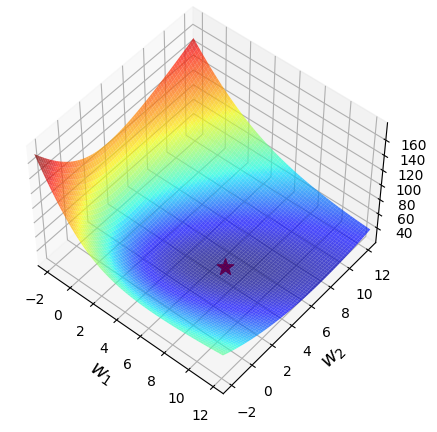

In [63]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
%matplotlib inline

import matplotlib.pyplot as plt


def error_func_2(w1, w2):
  return error_func(np.array([res.x[0], w1, w2]))

np_error = np.frompyfunc(error_func_2, 2, 1)

minima_ = np.array([res.x[1],  res.x[2]])

# Defines a grid
xmin, xmax, xstep = -2.5, 12.5, .2
ymin, ymax, ystep = -2.5, 12.5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = np_error(x, y).astype(float)

# Plots the error surface
fig1 = plt.figure(figsize=(8, 5))
ax1 = plt.axes(projection='3d', elev=50, azim=-50)
ax1.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.7, cmap=plt.cm.jet)
ax1.scatter3D(*minima_, error_func_2(*minima_), marker='*', color='r', s=150)
ax1.set_xlabel('$w_1$', fontsize=14)
ax1.set_ylabel('$w_2$', fontsize=14)
ax1.set_zlabel('L',)
ax1.set_xlim((xmin, xmax))
ax1.set_ylim((ymin, ymax))


plt.show()

El modelo óptimo está identificado por un asterisco (*) y corresponde al modelo con el error más bajo.

En la siguiente celda, obtendremos la secuencia de soluciones que el descenso del gradiente visita hasta encontrar el modelo óptimo. En este caso, la superficie de error está representada por líneas de contorno:


In [51]:
from matplotlib import animation
from IPython.display import HTML

initial_weights = np.array([0, -1, 1])


path_ = [initial_weights]

#  gradient descent
res = scipy.optimize.minimize(fun = error_func, x0 = initial_weights,
                              jac = grad_func, tol=1e-6, callback=make_minimize_cb(path_))
path = np.array(path_)[:,1:].T

# Plots de la trayetoria
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.contour(x, y, z, levels=np.logspace(0, 3, 50), norm=LogNorm(), cmap=plt.cm.jet)
ax2.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax2.plot(*minima_, 'r*', markersize=18)
ax2.set_xlabel('$w_1$')
ax2.set_ylabel('$w_2$')
ax2.set_xlim((xmin, xmax))
ax2.set_ylim((ymin, ymax))

plt.show()


NameError: ignored

# Usando librerias para el modelo logistico

La clase **LogisticRegression** de sklearn no utiliza una búsqueda exhaustiva para la optimización de los coeficientes del modelo. En su lugar, utiliza algoritmos de optimización que son variantes de la optimización por descenso de gradiente

Para **LogisticRegression** de sklearn, algunos hiperparámetros que podrías considerar optimizar incluyen:

- **C**: Parámetro de regularización. Valores más pequeños especifican una regularización más fuerte.
- **penalty**: Usado para especificar la norma en la penalización (l1, l2, elasticnet, none).
- **solver**: Algoritmo a usar en la optimización (newton-cg, lbfgs, liblinear, sag, saga).

In [71]:
import numpy as np
## selección  del model

logreg_model = LogisticRegression(random_state=0)


# Para el conjunto de entrenamiento
X_train = df_train.drop('Label', axis=1)
y_train = df_train['Label']

# Para el conjunto de prueba
X_test = df_test.drop('Label', axis=1)
y_test = df_test['Label']

logreg_model.fit(X_train, y_train)

#predecir con el  modelo entrenado  y los datos de test
y_pred_log = logreg_model.predict(X_test)



# Obteniendo los coeficientes
coefficients = logreg_model.coef_

arrayW = np.concatenate((logreg_model.intercept_[0].reshape(1, -1), coefficients), axis=1).T

print(arrayW)

# Obtener las probabilidades predichas
probs = logreg_model.predict_proba(X_train)[:, 1]

# Calcular la log-verosimilitud
nlog_like = -np.sum(y_train* np.log(probs) + (1 - y_train) * np.log(1 - probs))


accuracy_log = accuracy_score(y_test, y_pred_log)


print('Accuracy \t: %.4f' % accuracy_log)
print('neg log_likelihood \t: %.4f' % nlog_like)




[[-0.02460424]
 [ 3.01860714]
 [ 1.791084  ]]
Accuracy 	: 0.8119
neg log_likelihood 	: 34.6819


In [77]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
       'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
#    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Crear el modelo
logreg = LogisticRegression(max_iter=10000)

# Crear el grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)


best_model = grid_search.best_estimator_
coefficients = best_model.coef_
intercept = best_model.intercept_[0].reshape(1, -1)




Mejores hiperparámetros: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
[[-0.02460424]
 [ 3.01860714]
 [ 1.791084  ]]


# Resumiendo

En este laboratorio hemos explorado clasificadores lineales. Los clasificadores pueden verse como particiones del espacio de predictores en **regiones de decisión** separadas por **fronteras de decisión**. Cada región de decisión está asociada a una única etiqueta, de modo que las muestras que se encuentran dentro de la misma región de decisión se les asigna la misma etiqueta.

Hemos considerado clasificadores lineales en espacios de predictores 2D, es decir, problemas de clasificación con dos predictores. Los espacios de predictores de baja dimensión pueden visualizarse y son muy útiles para desarrollar nuestra intuición. Esta intuición será crucial para entender problemas de alta dimensión que no pueden visualizarse. Ten en cuenta que la **notación matemática para espacios de predictores de baja y alta dimensión es idéntica** y no requerirá ningún esfuerzo adicional. Los símbolos $\boldsymbol{x}$ y $\boldsymbol{w}$ pueden usarse para representar espacios de predictores de cualquier dimensión, 1D, 2D, 3D... 10D, 100D. Por eso, la notación vectorial es tan poderosa y deberías sentirte cómodo con ella.
Se trata de entender lo que significa cada operación en vectores, no de realizar el cálculo real. Por ejemplo, deberías saber que $\boldsymbol{x}^T\boldsymbol{w}$ es la distancia entre una muestra $\boldsymbol{x}$ y una frontera lineal definida por $\boldsymbol{w}$. Esta frontera podría ser una hipersuperficie en un espacio de predictores de 55D, pero $\boldsymbol{x}^T\boldsymbol{w}$ seguirá siendo una distancia.

Además de los clasificadores, también hemos abordado la **optimización**.

Recuerda jugar con el cuaderno. Cuanto más lo hagas, más intuición desarrollarás.

# Ejercicio
### Construcción del Clasificador para Predecir la Elección de Carreras en Ciencias

**Objetivo:** Desarrollar un clasificador que prediga si se espera que un estudiante elija una carrera en ciencias, basándose en datos específicos de un país, pr ejemplo, México.

**Instrucciones:**
1. Utiliza el conjunto de datos `pisa2015`.
2. Establece como variable dependiente a `PA032Q03TA`.
3. Divide el conjunto de datos en subconjuntos de entrenamiento y validación.
4. Implementa un modelo de regresión logística para responder a la pregunta planteada. Puedes optar por utilizar `LogisticRegression` de `sklearn` o las funciones proporcionadas anteriormente.
5. Determina el valor de log-likelihood del modelo.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics


from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [4]:
# carga los datos

import pandas as pd

data = pd.read_parquet("/content/drive/MyDrive/temporal/pisa2015.parquet")

data.head()
data_Mex = data.loc[data.CNT == 'Mexico']
data_Mex.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,PV3SSES,PV4SSES,PV5SSES,PV6SSES,PV7SSES,PV8SSES,PV9SSES,PV10SSES,SENWT,VER_DAT
282497,Mexico,Mexico,48400001.0,48403808,06MS,Mexico,Mexico,MEX - stratum 03: Lower Secondary \ Small,Mexico,Yes,...,298.850,282.382,334.227,411.375,352.194,343.202,249.672,315.180,2.66938,15NOV16:14:10:26
282498,Mexico,Mexico,48400001.0,48401960,06MS,Mexico,Mexico,MEX - stratum 03: Lower Secondary \ Small,Mexico,Yes,...,417.980,396.805,447.471,439.279,435.675,399.611,432.842,436.673,2.66938,15NOV16:14:10:26
282499,Mexico,Mexico,48400001.0,48406994,06MS,Mexico,Mexico,MEX - stratum 03: Lower Secondary \ Small,Mexico,Yes,...,433.859,452.199,439.267,532.349,517.094,496.881,449.321,354.670,2.66938,15NOV16:14:10:26
282500,Mexico,Mexico,48400002.0,48410157,06MS,Mexico,Mexico,MEX - stratum 01: Lower Secondary \ Large,Mexico,Yes,...,399.658,471.909,458.364,398.507,452.542,376.166,404.236,416.513,0.73879,15NOV16:14:10:26
282501,Mexico,Mexico,48400002.0,48405442,06MS,Mexico,Mexico,MEX - stratum 01: Lower Secondary \ Large,Mexico,Yes,...,314.351,367.800,311.247,298.801,307.128,325.529,382.032,314.819,0.70176,15NOV16:14:10:26


<ipython-input-15-337185af52bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Mex["ciencia_expectativas"]=data_Mex.PA032Q03TA.replace({"Yes":1,"No":0} )


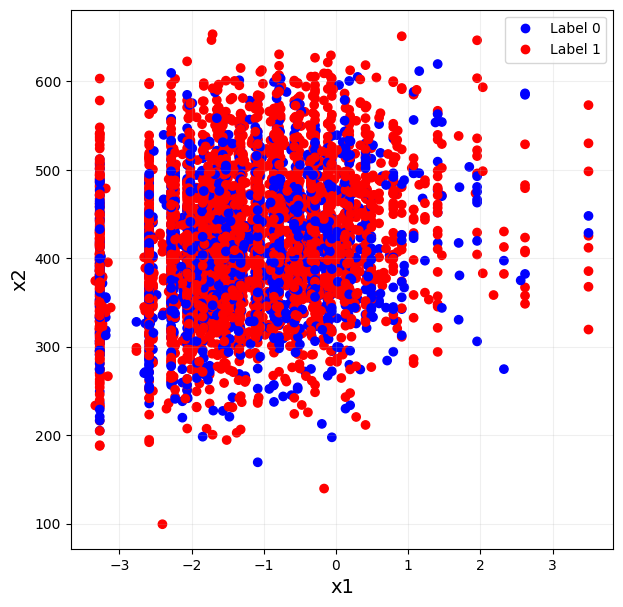

In [15]:

# adaptación de # la columna PA032Q03TA contiene la respuesta ¿Esperas que tu hijo ingrese en una carrera de ciencias?
data_Mex["ciencia_expectativas"]=data_Mex.PA032Q03TA.replace({"Yes":1,"No":0} )

data.head()
data_Mex = data.loc[data.CNT == 'Mexico']

#Para el análisis, he seleccionado la siguiente características

caracteristicas_usar =['JOYSCIE','INSTSCIE']
caracteristicas_usar =['ICTRES', 'PV1MATH','JOYSCIE']


# limpieza de datos

X_y=data_Mex[caracteristicas_usar+['ciencia_expectativas']].dropna()

X = X_y[caracteristicas_usar]
y = X_y.ciencia_expectativas

# Datos de entrenamiento (train) y prueba (test)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)


x1_train = X_train['ICTRES']
x2_train = X_train['PV1MATH']
x3_train = X_train['JOYSCIE']

# Plots

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))

scatter = plt.scatter(x1_train, x2_train, c=y_train, cmap=plt.get_cmap('bwr'))


plt.xlabel("x1", fontsize = 14)
plt.ylabel("x2", fontsize = 14)
plt.grid(alpha=0.2)
plt.legend(handles=scatter.legend_elements()[0], labels=["Label 0", "Label 1"])
plt.show()
